# Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import  LogisticRegression, LinearRegression
from IPython.display import Image, display  
import pydotplus 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from time import time
from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [2]:
df = pd.read_csv('data_of_terrorism_after_cleaning.csv')

In [3]:
df.drop(columns = 'Unnamed: 0', inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28614 entries, 0 to 28613
Data columns (total 25 columns):
CITY                                         28614 non-null object
COUNTRY                                      28614 non-null int64
Claimed Responsibility                       28614 non-null int64
DATE                                         28614 non-null float64
FATALITIES                                   28614 non-null int64
Group Name of Perpetrator Group              14608 non-null object
Hostages                                     28614 non-null float64
INJURED                                      28614 non-null int64
LOCATION DETAILS                             13153 non-null object
Name of Entity                               28614 non-null object
Nationality of Target                        28614 non-null object
Number of Perpetrator Fatalities             28614 non-null int64
PERPETRATOR GROUP                            14608 non-null object
PROVINCE/ADMINISTRATIVE

In [5]:
Target_Types = ['Abortion Related','Airports and Aircraft','Business', 'Educational Institution', 'Food or Water Supply', 'Government (Diplomatic)', 'Government (General)' ,'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other', 'Police',  'Private Citizens & Property', 'Religious Figures/Institutions', 'Telecommunication', 'Terrorists/Non-state Militia', 'Tourists', 'Transportation', 'Unknown', 'Utilities',  'Violent Political Party' ]
data = [0]*df.shape[0]

# ser = pd.Series(data, index =Target_Types)

for row in range(df.shape[0]):
    flag = True
    for Type in range(len(Target_Types)):
        if (flag):
            if (Target_Types[Type] in df['TARGET TYPE'][row]):
                data[row] = Type
                flag = False
df['TARGET TYPE'] = data

In [6]:
df.describe()

,COUNTRY,Claimed Responsibility,DATE,FATALITIES,Hostages,INJURED,Number of Perpetrator Fatalities,Property Damage,Ransom,Successful Attack?,Suicide_Attack,TARGET TYPE,Type of Attack,Weapon Sub_type,Weapon Type,latitude,longitude
count,28614.000000,28614.000000,2.861400e+04,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.000000,28614.00000,28614.000000,28614.000000,28614.000000,28614.000000
mean,2.031628,0.627036,1.459446e+09,2.820927,0.079262,3.373454,0.652548,0.282869,0.002586,0.843573,0.082792,10.750367,0.79503,2.949151,0.307227,30.782069,39.815550
std,2.862513,1.453982,5.084451e+07,15.327379,0.270152,12.999723,4.419069,0.450401,0.050789,0.363266,0.275572,3.875261,1.33175,3.997059,0.707988,7.064758,8.798183
min,0.000000,0.000000,1.381784e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,-28.725386,-84.284113
25%,0.000000,0.000000,1.416024e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.00000,0.000000,0.000000,31.444729,36.254771
50%,0.000000,0.000000,1.454105e+09,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.00000,2.000000,0.000000,33.302431,43.644167
75%,3.000000,0.000000,1.495228e+09,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,13.000000,2.00000,4.000000,0.000000,34.186303,44.378799
max,19.000000,9.000000,1.577743e+09,1570.000000,1.000000,1500.000000,346.000000,1.000000,1.000000,1.000000,1.000000,21.000000,7.00000,29.000000,8.000000,60.157381,121.022490


In [8]:
X_Weapon = df[[ 'Type of Attack', 'Weapon Sub_type','Weapon Type',"PERPETRATOR GROUP"]].copy()

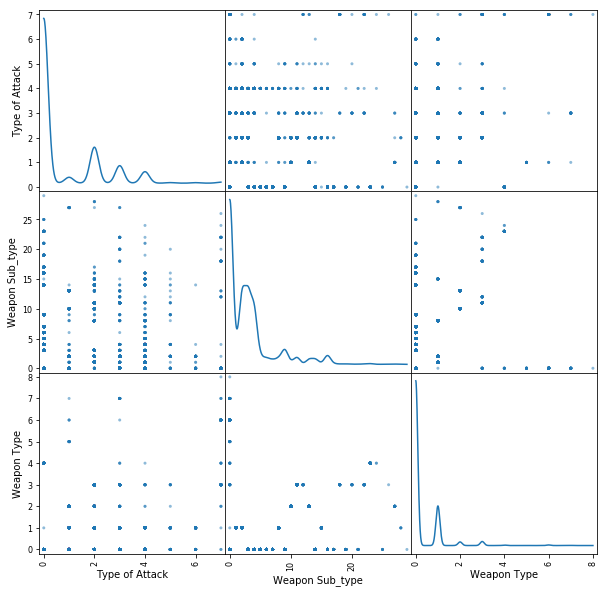

In [9]:
pd.plotting.scatter_matrix(X_Weapon, figsize=(10, 10), diagonal='kde')
plt.show()


In [10]:
X_Weapon = df[[ 'TARGET TYPE','Type of Attack', 'Weapon Sub_type','Weapon Type',"PERPETRATOR GROUP",'Successful Attack?','Ransom', 'Hostages', 'Property Damage' , 'Suicide_Attack']].copy()

In [11]:
X_Weapon = X_Weapon.dropna()
X_Weapon = X_Weapon.reset_index()
X_Weapon.drop(columns = 'index', inplace=True, axis=1)

In [12]:
dict_of_PERPETRATOR = dict()
revers_dict_of_PERPETRATOR = dict()
for i in range(len(df['PERPETRATOR GROUP'].unique())):
    dict_of_PERPETRATOR[df['PERPETRATOR GROUP'].unique()[i]] = i
    revers_dict_of_PERPETRATOR[i] = df['PERPETRATOR GROUP'].unique()[i]

In [13]:
y_Weapon = X_Weapon["PERPETRATOR GROUP"]
X_Weapon = X_Weapon[[ 'TARGET TYPE','Weapon Type','Successful Attack?']].copy()

In [14]:
y_Weapon =  y_Weapon.reset_index()
y_Weapon.drop(columns = 'index', inplace=True, axis=1)
y_Weapon =  y_Weapon.replace(dict_of_PERPETRATOR).copy()

In [15]:
XWtrain, XWtest , yWtrain ,yWtest = train_test_split(X_Weapon, y_Weapon,random_state = 0, test_size=0.2)

In [16]:
# set up the model, k-NN classification with k = ?  
k =  11              #len(df["PERPETRATOR GROUP"].unique())
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XWtrain, yWtrain)
yW_pred=clf.predict(XWtest)
print('Accuracy = ', int(metrics.accuracy_score(y_true = yWtest, y_pred = yW_pred)*10000)/100,"% in KNN Model with ", k," neighbors" )


Accuracy =  41.3 % in KNN Model with  11  neighbors


C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [17]:
def Regression_Score(df ,target_column):
    
    print("#################################")
    start_time = time()
    print("Start at: {}".format(start_time))
    print(target_column)
    
    features = df.columns[df.columns != target_column]
    X = df[features]
    X.drop(inplace=True,columns= ['Specific Description','Nationality of Target','Name of Entity','CITY', 'Group Name of Perpetrator Group', 'LOCATION DETAILS', 'PERPETRATOR GROUP', 'PROVINCE/ADMINISTRATIVE REGION/U.S. STATE'])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
#     print("Train Score:{}".format(X_train_scaled))

    X_test_scaled = scaler.transform(X_test)

    clf_model = LogisticRegression().fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
#     print("Test Score:{}".format(X_test_scaled))
    print("Finished at: {}".format(time()))
    print("--- {} seconds ---".format(time() - start_time))

    resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

    resDF["correct"] = abs((resDF["Actual"] ^ resDF["Predicted"]) - 1)

    print(target_column," ------ >  correct :  {} % in the LogisticRegression model ".format(int(len(resDF[resDF["correct"] == 1]) / len(resDF)*10000)/100))
    
    return


In [18]:
def load_dataset(df, target_column):
    y = df[target_column]
    X = df.drop([target_column],axis=1)

    return X, y

In [19]:
def Linear_Score(clf, x_train, x_test, y_test, y_train, model_name):
    print("#################################")
    start_time = time()
    print("Start at: {}".format(start_time))
    print(model_name)
    train_score = clf.score(x_train, y_train)
    print("Train Score:{}".format(train_score))
    test_score = clf.score(x_test, y_test)
    print("Test Score:{}".format(test_score))
    print("Finished at: {}".format(time()))
    print("--- {} seconds ---".format(time() - start_time))
    return train_score, test_score


def Naive_Bayes(x_train, y_train):
    gnb = GaussianNB().fit(x_train, y_train)
    return gnb


def Linear_Regression(x_train, y_train):
    clf = LinearRegression().fit(x_train, y_train)
    return clf


def Linear_BayesianRidge(x_train, y_train):
    clf = linear_model.BayesianRidge().fit(x_train, y_train)
    return clf


def Linear_Pipeline(x_train, y_train):
    clf = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))]).fit(
        x_train, y_train)
    return clf


def Linear_Perceptron(x_train, y_train):
    clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(x_train, y_train)
    return clf

In [20]:

def Models_scores (df, target_column):

    X, y = load_dataset(df, target_column)
    X_train, X_test , y_train ,y_test = train_test_split(X, y,random_state = 0, test_size=0.2)

    scaler = StandardScaler()
    x_scale_train = scaler.fit_transform(X_train)
    x_scale_test = scaler.transform(X_test)
    
    Linear_Regression_clf = Linear_Regression(x_scale_train, y_train)
    Linear_Pipeline_clf = Linear_Pipeline(x_scale_train, y_train)
    Linear_BayesianRidge_clf = Linear_BayesianRidge(x_scale_train, y_train)
    Linear_Perceptron_clf = Linear_Perceptron(x_scale_train, y_train)
    Naive_Bayes_clf = Naive_Bayes(x_scale_train, y_train)
    
    print("---------------------\n\n\n")
    print(target_column)
    Linear_Regression_Score = Linear_Score(Linear_Regression_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Regression")
    Linear_Pipeline_Score = Linear_Score(Linear_Pipeline_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Pipeline")
    Linear_BayesianRidge_Score = Linear_Score(Linear_BayesianRidge_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear BayesianRidge")
    Linear_Perceptron_Score = Linear_Score(Linear_Perceptron_clf, x_scale_train, x_scale_test, y_test, y_train, "Linear Perceptron")
    Naive_Bayes_Score = Linear_Score(Naive_Bayes_clf, x_scale_train, x_scale_test, y_test, y_train, "Naive Bayes")
      
    labels = ['Linear Regression', 'Linear Pipeline','Linear BayesianRidge' ,'Linear Perceptron', 'Naive Bayes']
    train_accuracy = [Linear_Regression_Score[0]*100, Linear_Pipeline_Score[0]*100, Linear_BayesianRidge_Score[0]*100,Linear_Perceptron_Score[0]*100,Naive_Bayes_Score[0]*100]
    test_acuracy = [Linear_Regression_Score[1]*100, Linear_Pipeline_Score[1]*100, Linear_BayesianRidge_Score[1]*100, Linear_Perceptron_Score[1]*100,Naive_Bayes_Score[1]*100]
    Model_plots (labels, train_accuracy,test_acuracy,target_column)

In [21]:
def Model_plots (labels, train_accuracy,test_acuracy,column_name):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(10,6),)
    rects1 = ax.bar(x - width/2, train_accuracy, width, label='train accuracy', color = "r")
    rects2 = ax.bar(x + width/2, test_acuracy, width, label='test acuracy', color = "lightcoral")
    ax.set_ylabel('accuracy')
    ax.set_title('accuracy of {} models'.format(column_name))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.ylim([0,100])
    plt.xticks(rotation='45')
    ax.legend()
    print(fig)

---------------------



month
#################################
Start at: 1622114711.869604
Linear Regression
Train Score:0.9931081700967885
Test Score:0.9930813203171026
Finished at: 1622114711.873603
--- 0.003998994827270508 seconds ---
#################################
Start at: 1622114711.873603
Linear Pipeline
Train Score:0.99345503027313
Test Score:0.9834246982747604
Finished at: 1622114712.212492
--- 0.33888888359069824 seconds ---
#################################
Start at: 1622114712.212492
Linear BayesianRidge
Train Score:0.993108170069918
Test Score:0.9930813155453764
Finished at: 1622114712.216492
--- 0.003999948501586914 seconds ---
#################################
Start at: 1622114712.216492
Linear Perceptron
Train Score:0.11991774932236658
Test Score:0.11757009345794392
Finished at: 1622114712.2224886
--- 0.0059967041015625 seconds ---
#################################
Start at: 1622114712.2224886
Naive Bayes
Train Score:0.11300121506682867
Test Score:0.111588785046728

---------------------



Successful Attack?
#################################
Start at: 1622114760.0187044
Linear Regression
Train Score:0.1276588305440144
Test Score:0.11118175283484188
Finished at: 1622114760.0227044
--- 0.003999948501586914 seconds ---
#################################
Start at: 1622114760.0227044
Linear Pipeline
Train Score:0.2858174776633705
Test Score:0.14024920138972918
Finished at: 1622114760.3225787
--- 0.29987430572509766 seconds ---
#################################
Start at: 1622114760.3225787
Linear BayesianRidge
Train Score:0.12712459216186323
Test Score:0.11102337663487803
Finished at: 1622114760.3265774
--- 0.003998756408691406 seconds ---
#################################
Start at: 1622114760.3265774
Linear Perceptron
Train Score:0.5740256098700813
Test Score:0.574392523364486
Finished at: 1622114760.3295763
--- 0.002998828887939453 seconds ---
#################################
Start at: 1622114760.3295763
Naive Bayes
Train Score:0.24095709879427984
Te

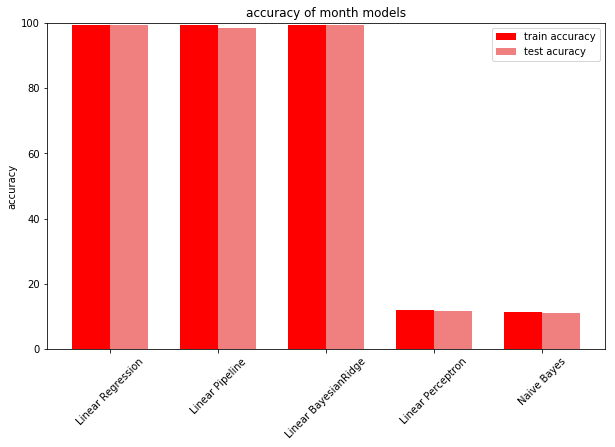

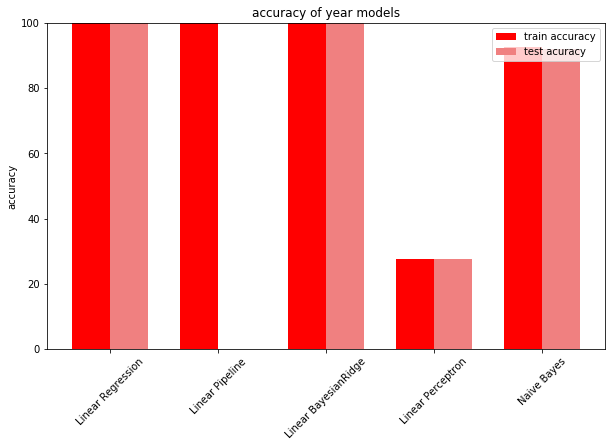

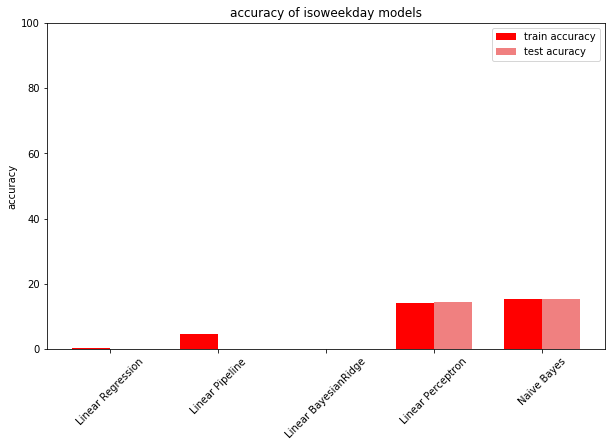

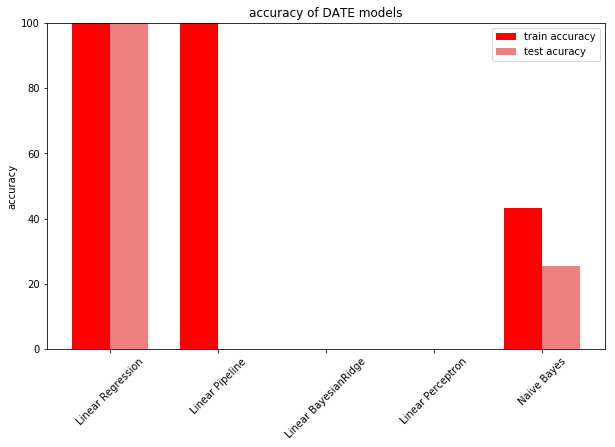

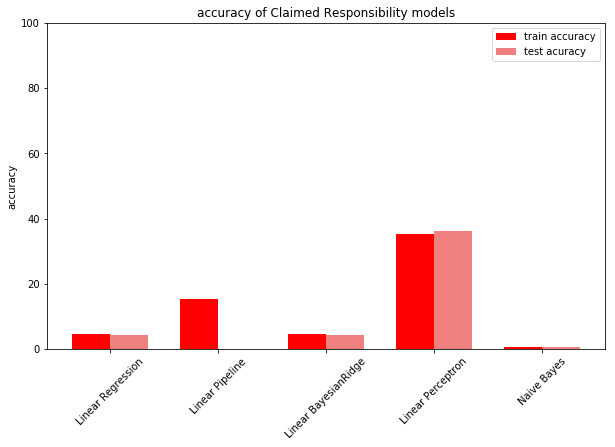

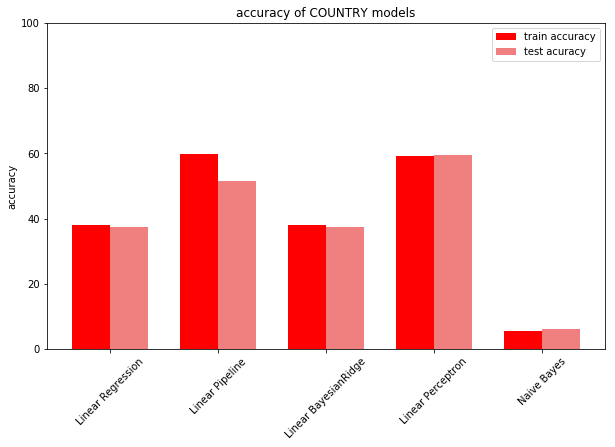

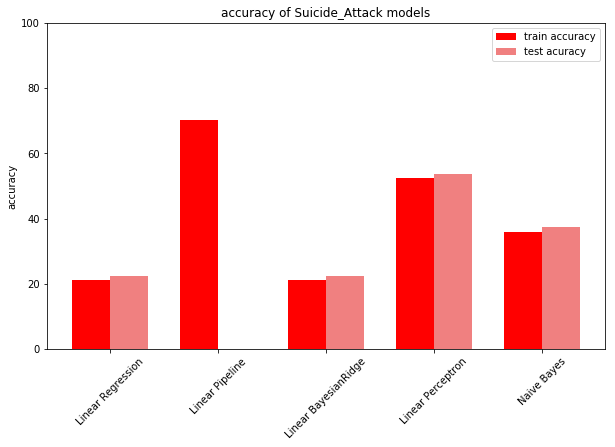

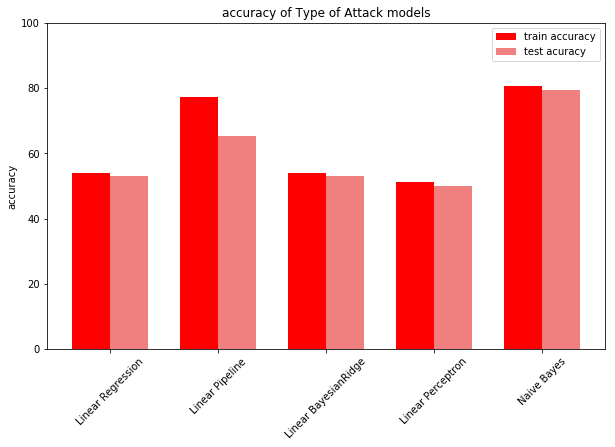

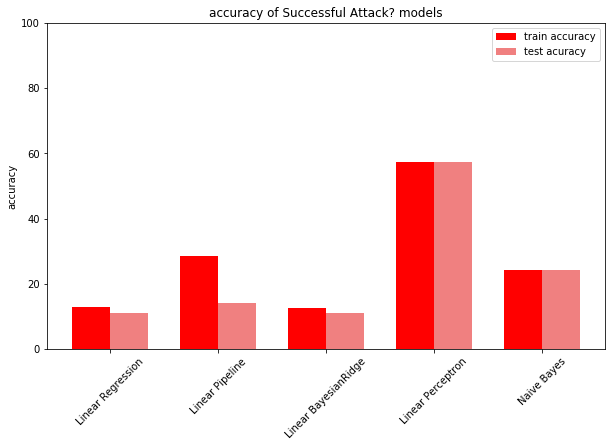

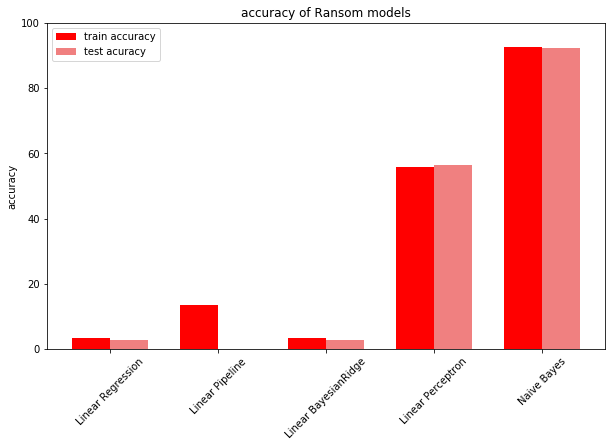

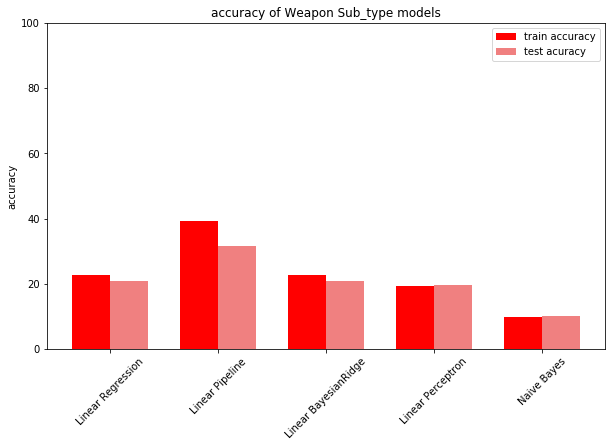

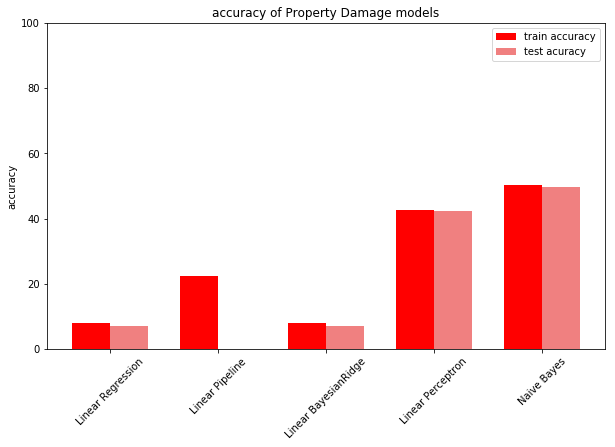

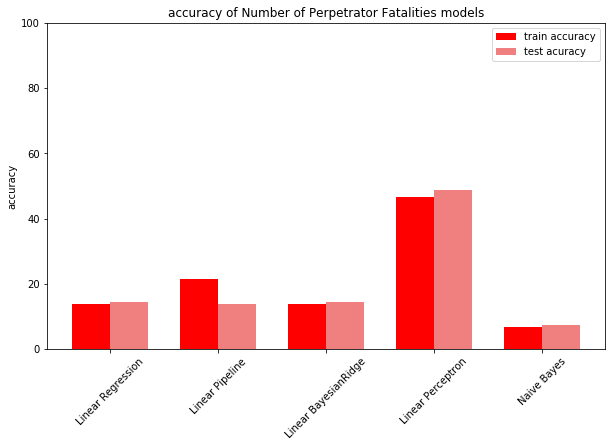

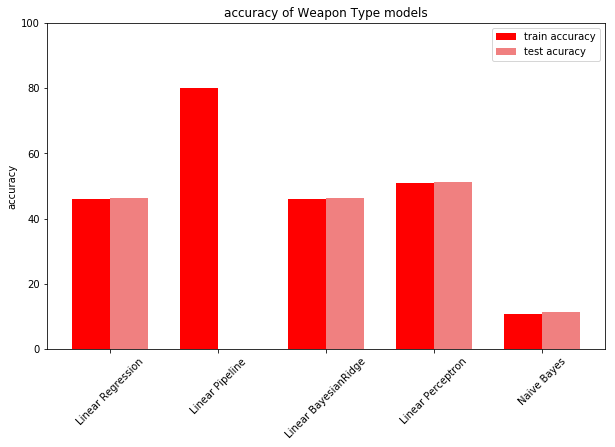

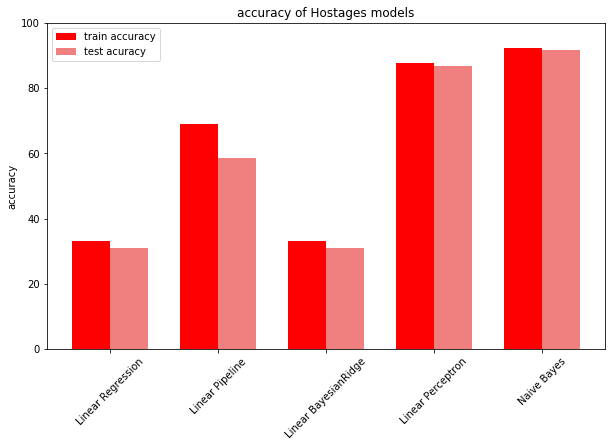

In [22]:
df1 = df[df["FATALITIES"]<15]
df1 = df1[df1["INJURED"]<15]
X1=df1[['DATE', 'Claimed Responsibility', 'COUNTRY', 'Suicide_Attack', 'Type of Attack','Successful Attack?','Ransom', 'Weapon Sub_type', 'Property Damage','Number of Perpetrator Fatalities','Weapon Type', 'Hostages','latitude', 'longitude']].copy()
X1 = X1.reset_index()
X1.drop(columns = 'index', inplace=True, axis=1)
month = list()
year = list()
isoweekday = list()

for row in range(X1.shape[0]):
    row_date = X1.DATE[row]
    month.append(datetime.fromtimestamp(row_date).month)
    year.append(datetime.fromtimestamp(row_date).year)
    isoweekday.append(datetime.fromtimestamp(row_date).isoweekday())
    
    
    
X1["month"]= month
X1["year"]= year
X1["isoweekday"] = isoweekday
    
list_types= ["month","year","isoweekday" ,'DATE', 'Claimed Responsibility', 'COUNTRY', 'Suicide_Attack', 'Type of Attack','Successful Attack?','Ransom', 'Weapon Sub_type', 'Property Damage','Number of Perpetrator Fatalities','Weapon Type', 'Hostages']
for type in list_types:
    Models_scores (X1, type)

In [23]:
list_types_reg= ["Successful Attack?","Suicide_Attack" ,'Property Damage'] 
for type in list_types_reg:
    Regression_Score(df, type)

#################################
Start at: 1622114773.4511063
Successful Attack?


C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Finished at: 1622114773.7981002
--- 0.34699392318725586 seconds ---
Successful Attack?  ------ >  correct :  84.08 % in the LogisticRegression model 
#################################
Start at: 1622114773.812097
Suicide_Attack
Finished at: 1622114773.95105
--- 0.13895297050476074 seconds ---
Suicide_Attack  ------ >  correct :  91.59 % in the LogisticRegression model 
#################################
Start at: 1622114773.9570484
Property Damage
Finished at: 1622114774.0700116
--- 0.11296319961547852 seconds ---
Property Damage  ------ >  correct :  71.37 % in the LogisticRegression model 


C:\Anaconda3\envs\py35\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Creating a decision tree to test what causes the success of the attack

In [24]:
def splitData(features):
    """
    Split a subset of the terror dataset, given by the features, into train and test sets.

"""
    df_predictors = df[features].values
    df_labels = df["Successful Attack?"].values
    
    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_predictors, df_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [25]:
def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Failed ", "Successful Attack"],                             #  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "Successful_Attack.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

Accuracy on training data =  0.8442021388131684
Accuracy on test data =  0.8429440134200042


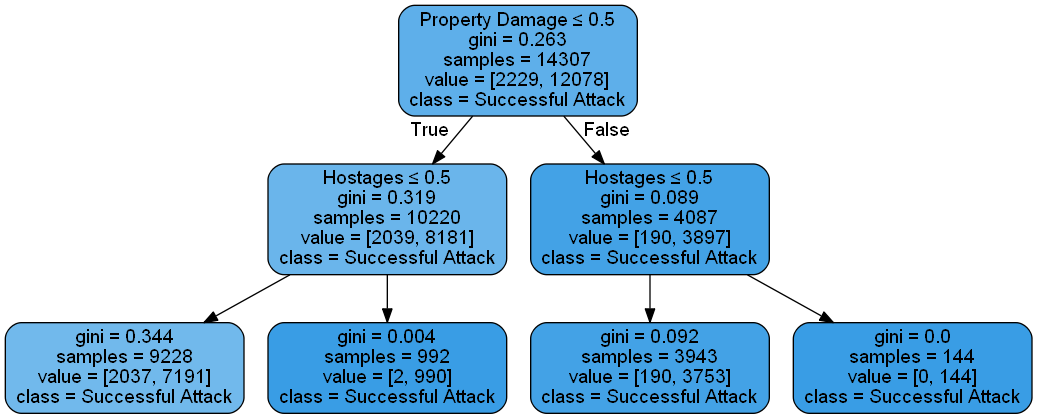

In [26]:
decisionTree = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=20)
used_features = ["Hostages" ,'Ransom', "Suicide_Attack",'Property Damage']
XTrain, XTest, yTrain, yTest = splitData(used_features)
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, used_features)

## Balance the data in the table

In [27]:
y = df['Successful Attack?']
df.drop(columns=['Successful Attack?'], inplace=True)
desc = df['Specific Description']

In [28]:
new_df = df.apply(lambda z: z.astype('category').cat.codes if z.dtype == object else z)
new_df = new_df.drop(columns=['Specific Description'])

### Lets check if the data is balanced:

In [29]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([ 4476, 24138], dtype=int64))

### The data is imbalanced. We will balance it.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size=0.3, stratify=y)

In [31]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([ 3133, 16896], dtype=int64))

In [32]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train) # Data balancing

In [33]:
param_space = {
    'model__max_features': ['auto', 'sqrt', 'log2', None],
    'model__criterion': ['gini', 'entropy']
}
model = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier())])
model = GridSearchCV(model, param_grid=param_space, cv=3, return_train_score=True, verbose=10, scoring=('roc_auc')).fit(x_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] model__max_features=auto, model__criterion=gini .................
[CV]  model__max_features=auto, model__criterion=gini, score=(train=1.000, test=0.829), total=   0.1s
[CV] model__max_features=auto, model__criterion=gini .................
[CV]  model__max_features=auto, model__criterion=gini, score=(train=1.000, test=0.936), total=   0.1s
[CV] model__max_features=auto, model__criterion=gini .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_features=auto, model__criterion=gini, score=(train=1.000, test=0.940), total=   0.1s
[CV] model__max_features=sqrt, model__criterion=gini .................
[CV]  model__max_features=sqrt, model__criterion=gini, score=(train=1.000, test=0.853), total=   0.1s
[CV] model__max_features=sqrt, model__criterion=gini .................
[CV]  model__max_features=sqrt, model__criterion=gini, score=(train=1.000, test=0.932), total=   0.1s
[CV] model__max_features=sqrt, model__criterion=gini .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_features=sqrt, model__criterion=gini, score=(train=1.000, test=0.934), total=   0.1s
[CV] model__max_features=log2, model__criterion=gini .................
[CV]  model__max_features=log2, model__criterion=gini, score=(train=1.000, test=0.857), total=   0.1s
[CV] model__max_features=log2, model__criterion=gini .................
[CV]  model__max_features=log2, model__criterion=gini, score=(train=1.000, test=0.928), total=   0.1s
[CV] model__max_features=log2, model__criterion=gini .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s


[CV]  model__max_features=log2, model__criterion=gini, score=(train=1.000, test=0.937), total=   0.1s
[CV] model__max_features=None, model__criterion=gini .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s


[CV]  model__max_features=None, model__criterion=gini, score=(train=1.000, test=0.884), total=   0.2s
[CV] model__max_features=None, model__criterion=gini .................
[CV]  model__max_features=None, model__criterion=gini, score=(train=1.000, test=0.951), total=   0.2s
[CV] model__max_features=None, model__criterion=gini .................
[CV]  model__max_features=None, model__criterion=gini, score=(train=1.000, test=0.950), total=   0.2s
[CV] model__max_features=auto, model__criterion=entropy ..............
[CV]  model__max_features=auto, model__criterion=entropy, score=(train=1.000, test=0.842), total=   0.1s
[CV] model__max_features=auto, model__criterion=entropy ..............
[CV]  model__max_features=auto, model__criterion=entropy, score=(train=1.000, test=0.931), total=   0.1s
[CV] model__max_features=auto, model__criterion=entropy ..............
[CV]  model__max_features=auto, model__criterion=entropy, score=(train=1.000, test=0.937), total=   0.1s
[CV] model__max_features

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.9s finished


In [34]:
model.best_params_

{'model__criterion': 'entropy', 'model__max_features': None}

In [35]:
model = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier(criterion='entropy', max_features=None,max_depth=3, min_samples_split=20))])
model = model.fit(x_train, y_train)

In [36]:
model.score(x_test, y_test) # Great score

0.7753057658707048

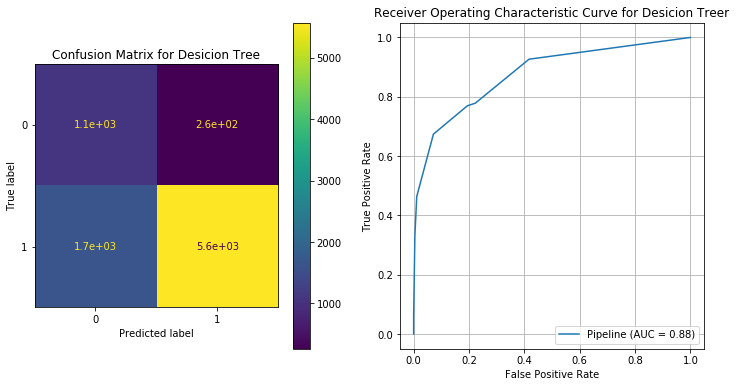

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix for Desicion Tree')
plot_confusion_matrix(model, x_test, y_test, ax=plt.gca())
plt.subplot(1, 2, 2)
plt.grid()
plt.title('Receiver Operating Characteristic Curve for Desicion Treer')
plot_roc_curve(model, x_test, y_test, ax=plt.gca())
plt.show()

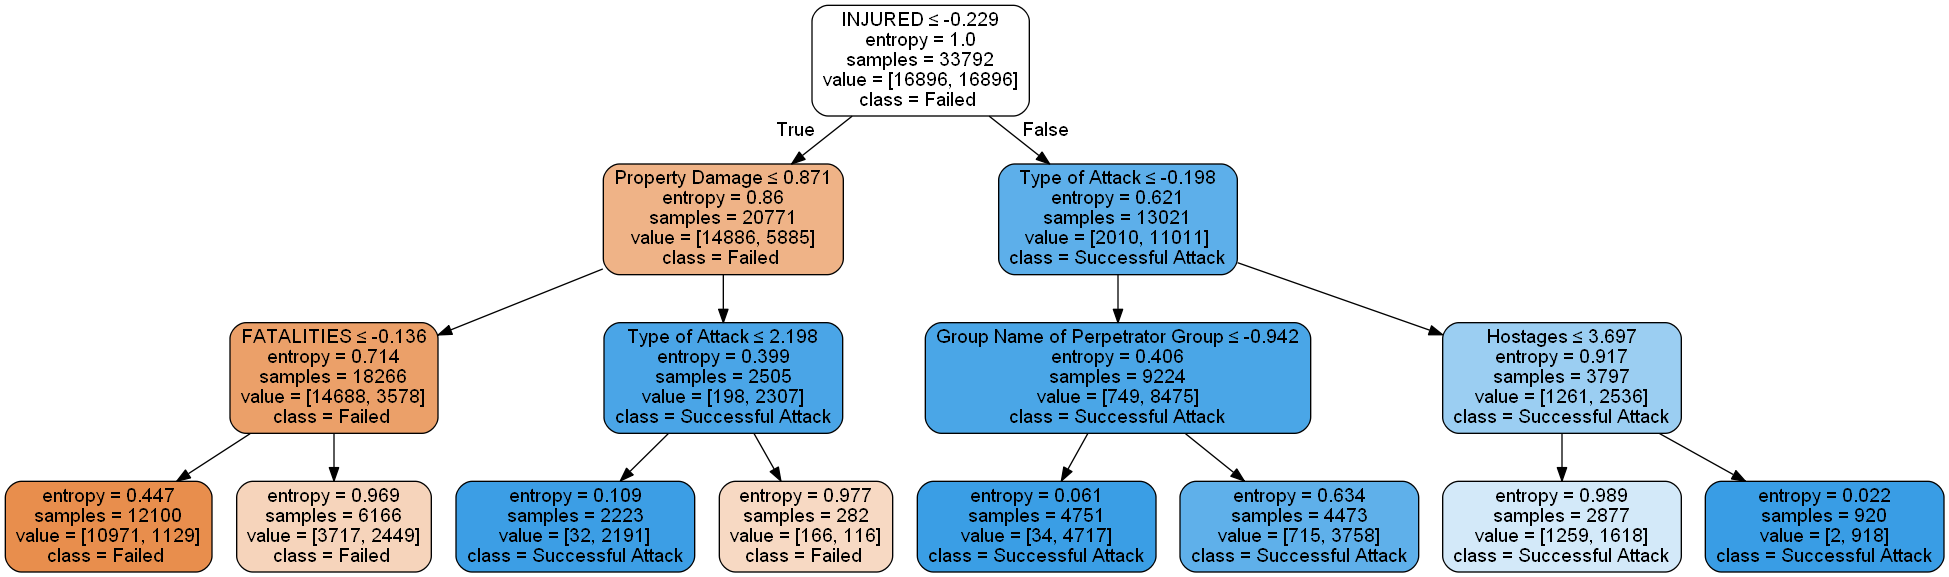

In [38]:
renderTree(model.steps[1][1], x_train.columns)